## Imports

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

## Loading data

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
chw_res = pd.read_csv("/content/chw_reserve.csv")
chw_sinfo = pd.read_csv("/content/chw_store_info.csv")
dinfo = pd.read_csv("/content/date_info.csv")
store_rel = pd.read_csv("/content/store_id_relation.csv")
yom_res = pd.read_csv("/content/yom_reserve.csv")
yom_sinfo = pd.read_csv("/content/yom_store_info.csv")

## Checking null values

In [ ]:
train_df.isna().sum()

chw_store_id    0
visit_date      0
visitors        0
dtype: int64

In [ ]:
test_df.isna().sum()

chw_store_id    0
visit_date      0
dtype: int64

In [ ]:
chw_res.isna().sum()

chw_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [ ]:
chw_sinfo.isna().sum()

chw_store_id      0
chw_genre_name    0
chw_area_name     0
latitude          0
longitude         0
dtype: int64

In [ ]:
dinfo.isna().sum()

calendar_date    0
day_of_week      0
holiday_flg      0
dtype: int64

In [ ]:
store_rel.isna().sum()

chw_store_id    0
yom_store_id    0
dtype: int64

In [ ]:
yom_res.isna().sum()

yom_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [ ]:
yom_sinfo.isna().sum()

yom_store_id      0
yom_genre_name    0
yom_area_name     0
latitude          0
longitude         0
dtype: int64

No null values present in the data.

## Some preprocessing

### Matching date format of date_info with other files

In [ ]:
# Matching the format of date on dinfo with that of test and train so that it merges easily
dinfo['calendar_date'] = dinfo.apply(lambda row : datetime.datetime.strptime(row['calendar_date'], '%Y-%m-%d').strftime('%-m/%-d/%Y'), axis=1)
dinfo.head()


,calendar_date,day_of_week,holiday_flg
0,1/1/2016,Friday,1
1,1/2/2016,Saturday,1
2,1/3/2016,Sunday,1
3,1/4/2016,Monday,0
4,1/5/2016,Tuesday,0


In [ ]:
dinfo.set_index('calendar_date', inplace=True)

### Checking if we have store info for every chwiggy restraunt 

In [ ]:
a1 = chw_sinfo['chw_store_id'].unique()
a1.sort()

In [ ]:
a2 = train_df['chw_store_id'].unique()
a2.sort()

In [ ]:
len(a1)

829

In [ ]:
len(a2)

829

In [ ]:
(a1 == a2).sum()

829

In [ ]:
chw_sinfo.set_index('chw_store_id', inplace=True)
yom_sinfo.set_index('yom_store_id', inplace=True)

### Checking if every restraunt in test is covered in train

In [ ]:
testIds = list(test_df['chw_store_id'].unique())
trainIds = set(train_df['chw_store_id'].unique())

In [ ]:
for i in testIds:
    if i not in trainIds:
        print("No match for", i, "in trainIds")
        
print("End")

End


### Adding date and store information to the train dataframe

In [ ]:
train_df = pd.merge(left = train_df, right = dinfo, left_on = 'visit_date', right_on='calendar_date', how="left")

In [ ]:
train_df.head()

,chw_store_id,visit_date,visitors,day_of_week,holiday_flg
0,air_3561fd1c0bce6a95,8/25/2016,8,Thursday,0
1,air_26c5bbeb7bb82bf1,1/11/2017,9,Wednesday,0
2,air_c1ff20617c54fee7,8/10/2016,13,Wednesday,0
3,air_310e467e6e625004,3/10/2017,17,Friday,0
4,air_671b4bea84dafb67,6/1/2016,34,Wednesday,0


Date information added

<br>

In [ ]:
train_df = pd.merge(left = train_df, right = chw_sinfo, left_on = 'chw_store_id', right_on='chw_store_id', how="left")

In [ ]:
train_df.head()

,chw_store_id,visit_date,visitors,day_of_week,holiday_flg,chw_genre_name,chw_area_name,latitude,longitude
0,air_3561fd1c0bce6a95,8/25/2016,8,Thursday,0,Italian/French,Tōkyō-to Ōta-ku Kamiikedai,35.602201,139.697689
1,air_26c5bbeb7bb82bf1,1/11/2017,9,Wednesday,0,Cafe/Sweets,Tōkyō-to Kita-ku Ōjihonchō,35.752804,139.733480
2,air_c1ff20617c54fee7,8/10/2016,13,Wednesday,0,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,35.641463,139.698171
3,air_310e467e6e625004,3/10/2017,17,Friday,0,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861
4,air_671b4bea84dafb67,6/1/2016,34,Wednesday,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


Store information added

### Splitting date into day, month and year

In [ ]:
train_df[["month", "day", "year"]] = train_df["visit_date"].str.split("/", expand = True)
train_df['day'] = pd.to_numeric(train_df['day'])
train_df['month'] = pd.to_numeric(train_df['month'])
train_df['year'] = pd.to_numeric(train_df['year'])

In [ ]:
train_df.dtypes

chw_store_id       object
visit_date         object
visitors            int64
day_of_week        object
holiday_flg         int64
chw_genre_name     object
chw_area_name      object
latitude          float64
longitude         float64
month               int64
day                 int64
year                int64
dtype: object

<br>
<br>

## Restaurant Wise analysis of data

### Analysis of average visitors per day

In [ ]:
resGp = train_df.groupby(['chw_store_id'])

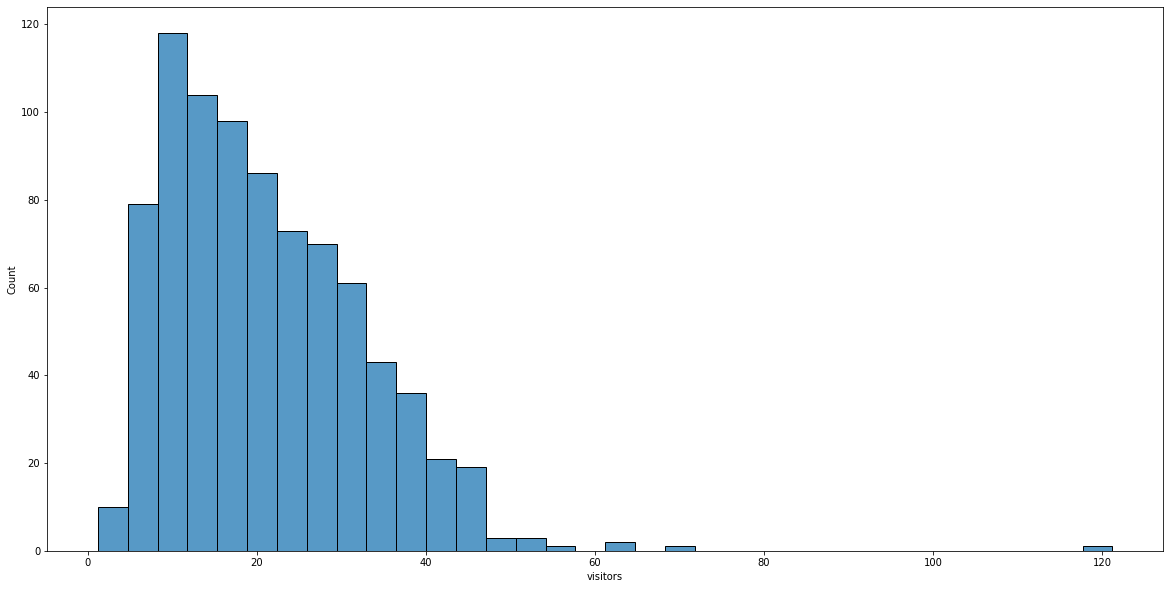

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(resGp['visitors'].mean())

We see some outliers here and the distribution is skewed towards left.

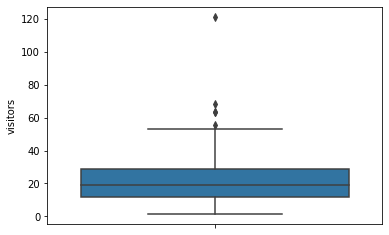

In [ ]:
sns.boxplot(y = resGp['visitors'].mean())

### Analysis of average reserve visitors at a time in chwiggy restaurants

In [ ]:
chwGp = chw_res.groupby(['chw_store_id'])

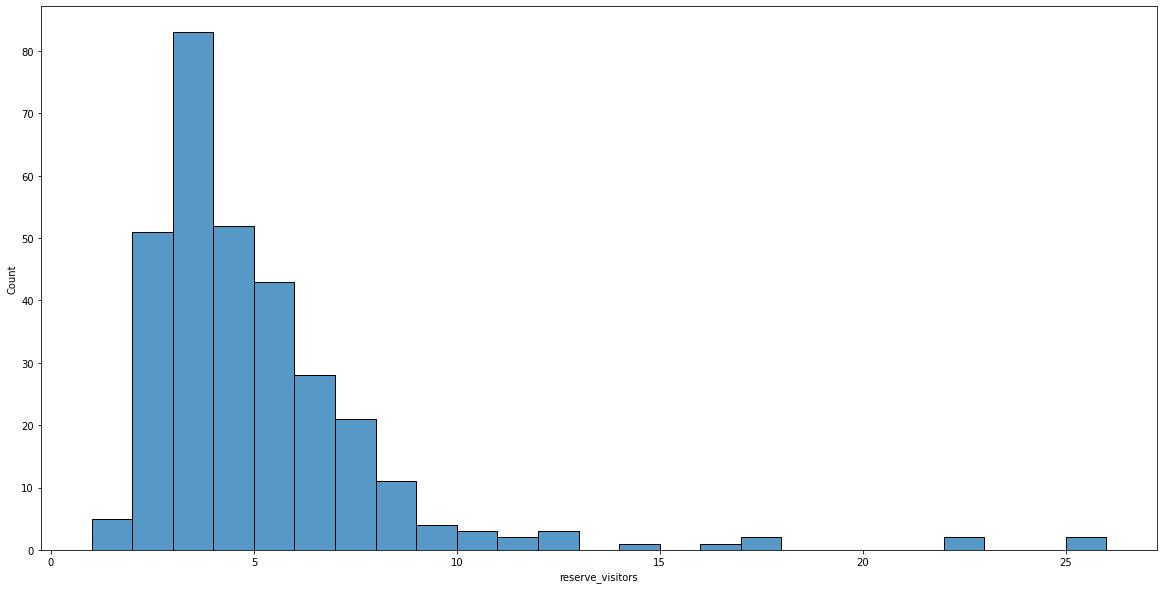

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(chwGp['reserve_visitors'].mean(), binwidth=1)

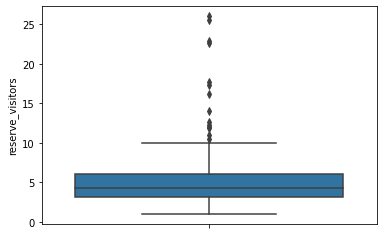

In [ ]:
sns.boxplot(y = chwGp['reserve_visitors'].mean())

### Analysis of average reserve visitors at a time in yomato restaurants




In [ ]:
yomGp = yom_res.groupby(['yom_store_id'])

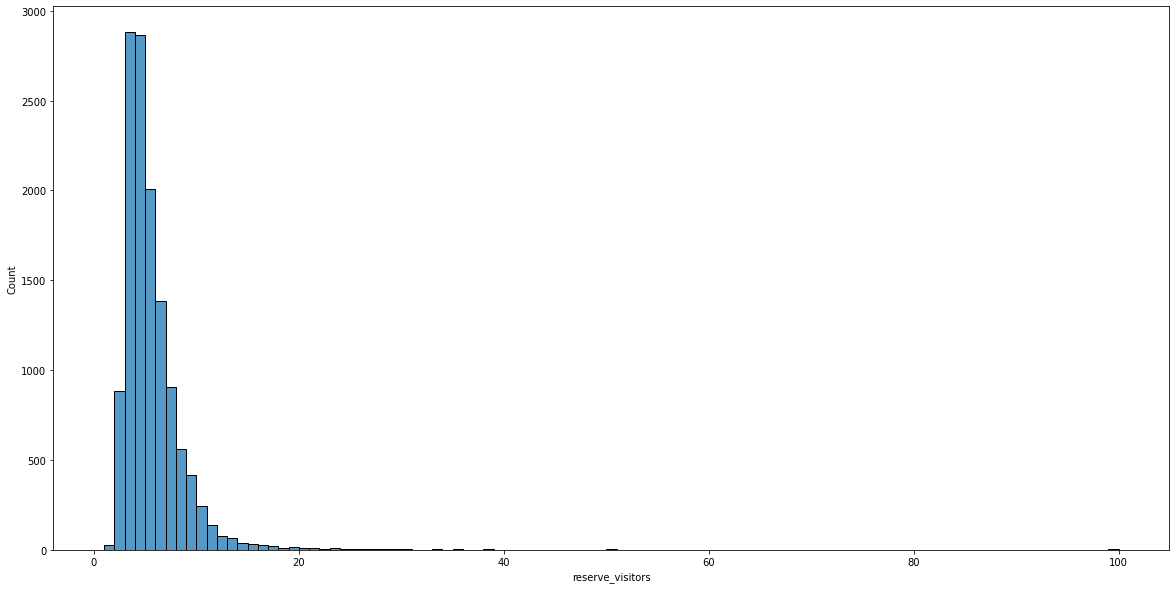

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(yomGp['reserve_visitors'].mean(), binwidth=1)

In [ ]:
yomGp['reserve_visitors'].mean().mean()

5.716708416779123

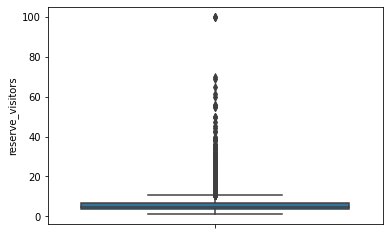

In [ ]:
sns.boxplot(y = yomGp['reserve_visitors'].mean())

<br>

## Time based analysis

### Adding date info to reserve datasets for analysis

In [ ]:
# Adding date info to chwiggy reserve dataset
# dsplit_chw_res = chw_res

# dsplit_chw_res['visit_date'] = dsplit_chw_res.apply(lambda row : row['visit_datetime'].split(" ")[0], axis=1)
# dsplit_chw_res['visit_time'] = dsplit_chw_res.apply(lambda row : row['visit_datetime'].split(" ")[1], axis=1)

# dsplit_chw_res['reserve_date'] = dsplit_chw_res.apply(lambda row : row['reserve_datetime'].split(" ")[0], axis=1)
# dsplit_chw_res['reserve_time'] = dsplit_chw_res.apply(lambda row : row['reserve_datetime'].split(" ")[1], axis=1)

# dsplit_chw_res[["month", "day", "year"]] = dsplit_chw_res["visit_date"].str.split("/", expand = True)

# dsplit_chw_res['visit_time'] = dsplit_chw_res.apply(lambda row : row['visit_time'].split(":")[0], axis=1)
# dsplit_chw_res['visit_time'] = pd.to_numeric(dsplit_chw_res['visit_time'])
# dsplit_chw_res['reserve_time'] = dsplit_chw_res.apply(lambda row : row['reserve_time'].split(":")[0], axis=1)
# dsplit_chw_res['reserve_time'] = pd.to_numeric(dsplit_chw_res['reserve_time'])

In [ ]:
# dsplit_chw_res['day_of_week'] = dsplit_chw_res.apply(lambda row : dinfo.loc[row['visit_date'], 'day_of_week'], axis=1)
# dsplit_chw_res['holiday_flg'] = dsplit_chw_res.apply(lambda row : dinfo.loc[row['visit_date'], 'holiday_flg'], axis=1)

In [ ]:
# Adding date info to yomato reserve dataset
# dsplit_yom_res = yom_res

# dsplit_yom_res['visit_date'] = dsplit_yom_res.apply(lambda row : row['visit_datetime'].split(" ")[0], axis=1)
# dsplit_yom_res['visit_time'] = dsplit_yom_res.apply(lambda row : row['visit_datetime'].split(" ")[1], axis=1)

# dsplit_yom_res['reserve_date'] = dsplit_yom_res.apply(lambda row : row['reserve_datetime'].split(" ")[0], axis=1)
# dsplit_yom_res['reserve_time'] = dsplit_yom_res.apply(lambda row : row['reserve_datetime'].split(" ")[1], axis=1)

# dsplit_yom_res[["month", "day", "year"]] = dsplit_yom_res["visit_date"].str.split("/", expand = True)

In [ ]:
# dsplit_yom_res['day_of_week'] = dsplit_yom_res.apply(lambda row : dinfo.loc[row['visit_date'], 'day_of_week'], axis=1)
# dsplit_yom_res['holiday_flg'] = dsplit_yom_res.apply(lambda row : dinfo.loc[row['visit_date'], 'holiday_flg'], axis=1)

### Day wise analysis of average visitors per day

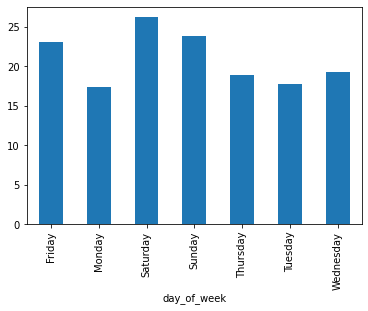

In [ ]:
day_visitorsGp = train_df.groupby(['day_of_week'])
day_visitorsGp['visitors'].mean().plot.bar()

The average visitors per day is high on Saturday, Sunday and Friday and low on Monday and Tuesday.

### Day wise analysis of average reservations per day in chwiggy restaurant

In [ ]:
dinfo.head()

,day_of_week,holiday_flg
calendar_date,,
1/1/2016,Friday,1
1/2/2016,Saturday,1
1/3/2016,Sunday,1
1/4/2016,Monday,0
1/5/2016,Tuesday,0


In [ ]:
chw_res['visit_date'] = chw_res.apply(lambda row : row['visit_datetime'].split(" ")[0], axis=1)

In [ ]:
chw_res = pd.merge(left = chw_res, right = dinfo, left_on = 'visit_date', right_on='calendar_date', how="left")

In [ ]:
chw_res['visit_date'] = pd.to_datetime(chw_res['visit_date'])

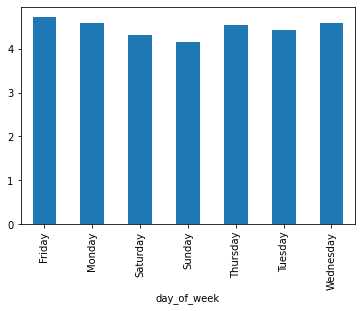

In [ ]:
day_res_chw_Gp = chw_res.groupby(['day_of_week'])
day_res_chw_Gp['reserve_visitors'].mean().plot.bar()

### Day wise analysis of average reservations per day in yomato restaurant

In [ ]:
yom_res['visit_date'] = yom_res.apply(lambda row : row['visit_datetime'].split(" ")[0], axis=1)

In [ ]:
yom_res = pd.merge(left = yom_res, right = dinfo, left_on = 'visit_date', right_on='calendar_date', how="left")

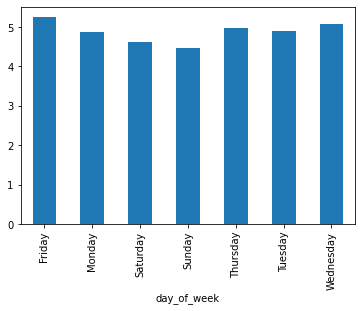

In [ ]:
day_res_yom_Gp = yom_res.groupby(['day_of_week'])
day_res_yom_Gp['reserve_visitors'].mean().plot.bar()

### Year wise analysis of average visitors per day

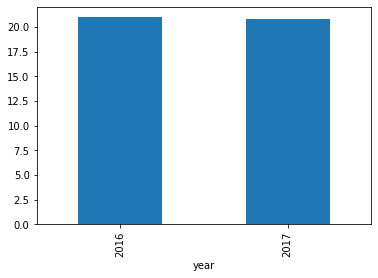

In [ ]:
yr_visitorsGp = train_df.groupby(['year'])
yr_visitorsGp['visitors'].mean().plot.bar()

So the average visitors per day is almost same for both the years.

### Year wise analysis of total visitors 

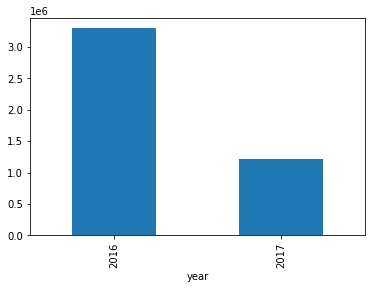

In [ ]:
yr_visitorsGp = train_df.groupby(['year'])
yr_visitorsGp['visitors'].sum().plot.bar()

This is probably due to collection of more data for the year 2016.

### Date wise analysis of average visitors per day

In [ ]:
date_visitorsGp = train_df.groupby(['year', 'month', 'day'])

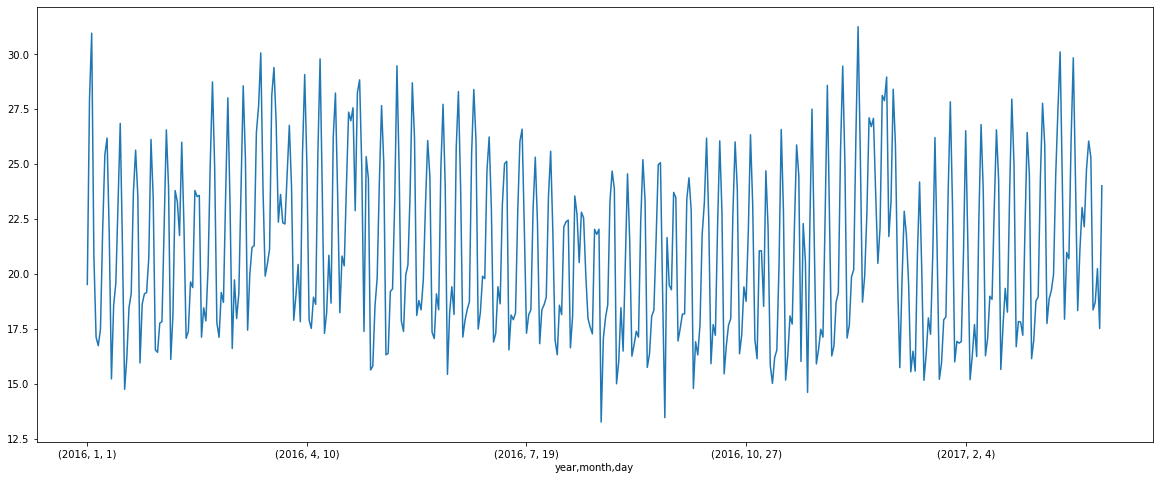

In [ ]:
plt.figure(figsize=(20,8))
date_visitorsGp['visitors'].mean().plot()

In [ ]:
date_meandata = date_visitorsGp['visitors'].mean()
rolmean = date_meandata.rolling(window=20).mean()
rolstd = date_meandata.rolling(window=20).std()

Text(0, 0.5, 'Average visitors per day')

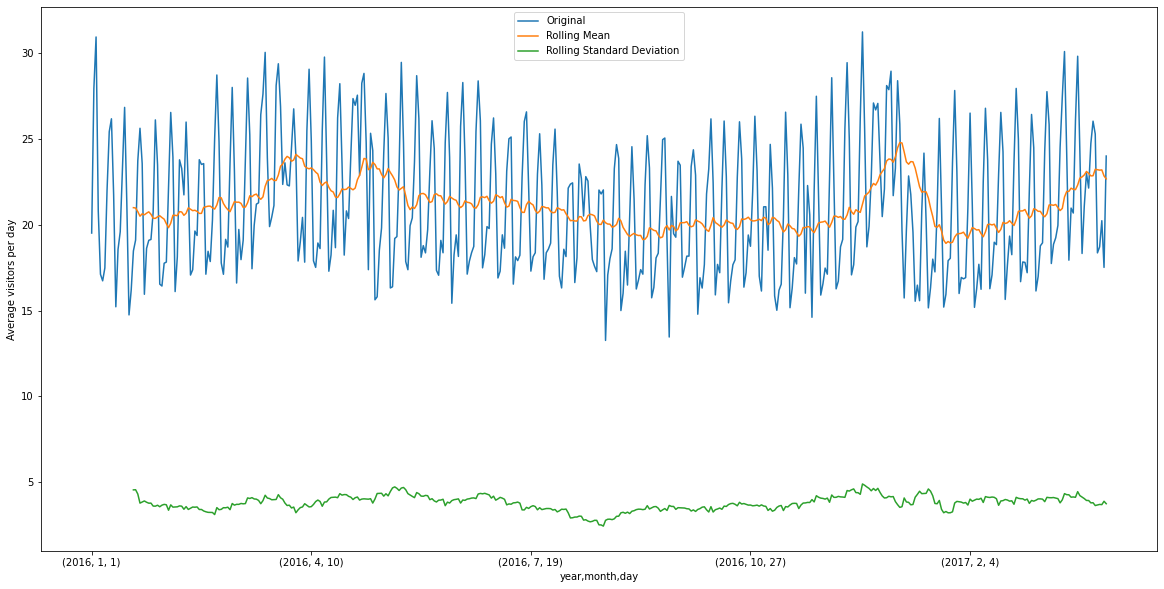

In [ ]:
plt.figure(figsize=(20,10))
date_meandata.plot(label='Original', legend=True)
rolmean.plot(label='Rolling Mean', legend=True)
rolstd.plot(label='Rolling Standard Deviation', legend=True)
plt.ylabel('Average visitors per day')

Not seeing any specific trend in mean such as an increasing or decreasing mean.

### Date wise analysis of total visitors 

In [ ]:
date_visitorsGp = train_df.groupby(['year', 'month', 'day'])

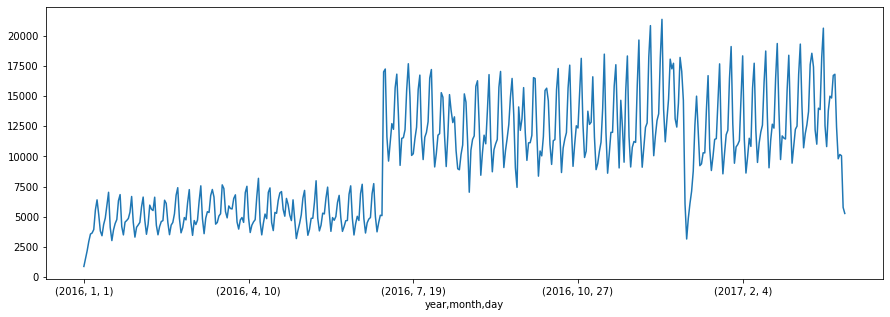

In [ ]:
plt.figure(figsize=(15,5))
date_visitorsGp['visitors'].sum().plot()

### Date wise analysis of total reserve visitors in chwiggy restaurants 

In [ ]:
# chw_res['visit_date'] = chw_res.apply(lambda row : row['visit_datetime'].split(" ")[0], axis=1)

In [ ]:
# Make the total reserve visitors graph for chwiggy restaurants
chw_res.visit_date = pd.to_datetime(chw_res.visit_date)

In [ ]:
res_date = chw_res.groupby('visit_date').sum()

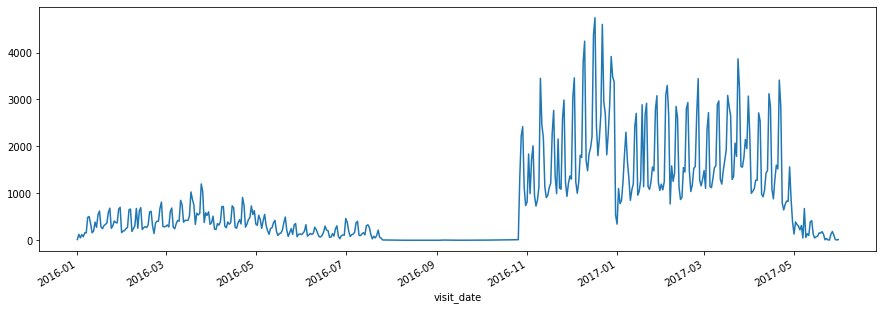

In [ ]:
res_date['reserve_visitors'].plot(figsize=[15, 5])

* More restaurants for chwiggy in the november of 2016

### Date wise analysis of total reserve visitors in yomato restaurants 

In [ ]:
yom_res.head()

,yom_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,day_of_week,holiday_flg
0,hpg_c63f6f42e088e50f,1/1/2016 11:00,1/1/2016 9:00,1,1/1/2016,Friday,1
1,hpg_dac72789163a3f47,1/1/2016 13:00,1/1/2016 6:00,3,1/1/2016,Friday,1
2,hpg_c8e24dcf51ca1eb5,1/1/2016 16:00,1/1/2016 14:00,2,1/1/2016,Friday,1
3,hpg_24bb207e5fd49d4a,1/1/2016 17:00,1/1/2016 11:00,5,1/1/2016,Friday,1
4,hpg_25291c542ebb3bc2,1/1/2016 17:00,1/1/2016 3:00,13,1/1/2016,Friday,1


In [ ]:
# yom_res['visit_date'] = yom_res.apply(lambda row : row['visit_datetime'].split(" ")[0], axis=1)

In [ ]:
# Make the total reserve visitors graph for yomato restaurants
yom_res.visit_date = pd.to_datetime(yom_res.visit_date)

In [ ]:
yom_res_date = yom_res.groupby('visit_date').sum()

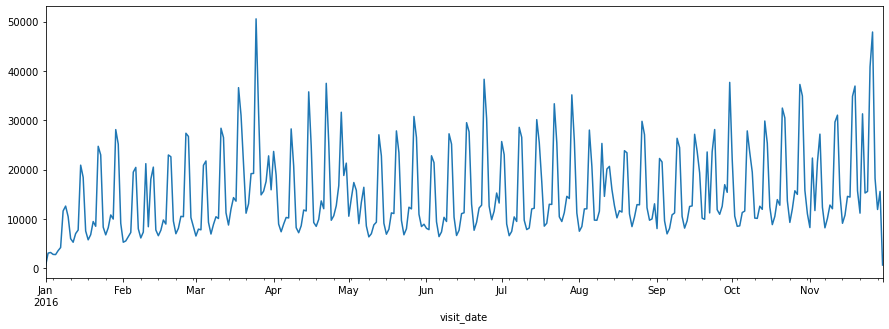

In [ ]:
yom_res_date['reserve_visitors'].plot(figsize=[15, 5])

<br>

### Month wise Analysis of average visitors per day 

In [ ]:
month_visitorsGp = train_df.groupby(['year', 'month'])

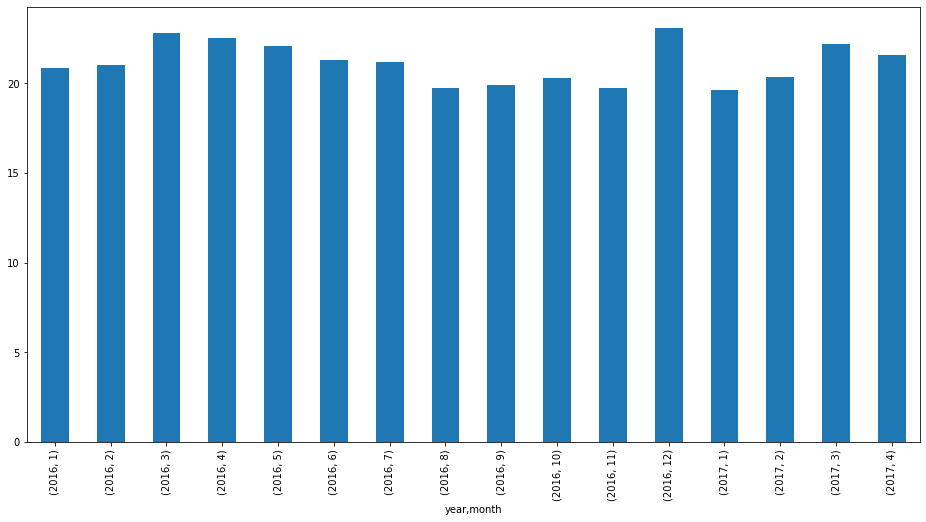

In [ ]:
# Average visitors plot
plt.figure(figsize=(16,8))
month_visitorsGp['visitors'].mean().plot.bar()

The starting pattern for the first 4 months is similar in both 2016 and 2017.

### Month wise Analysis of total visitors

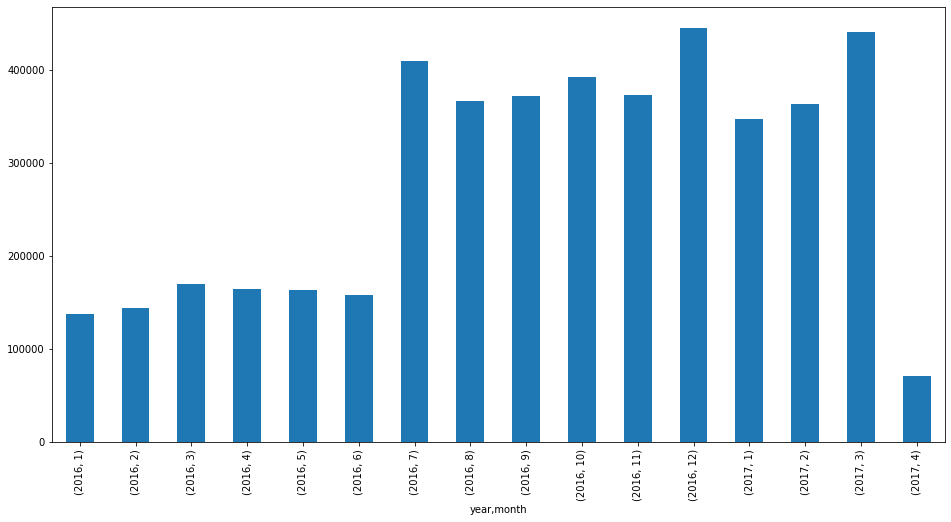

In [ ]:
plt.figure(figsize=(16,8))
month_visitorsGp['visitors'].sum().plot.bar()

The total visitors abruplty increase in the seventh month of 2016 probably due to more restaurant data for these months.

## Holiday / non-Holiday Analysis of visitors

In [ ]:
holGp =  train_df.groupby(['holiday_flg'])

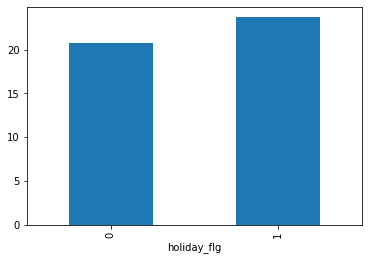

In [ ]:
holGp['visitors'].mean().plot.bar()

As expected, the average number of visitors on holidays are more than on non-holidays.

### Genre wise analysis of visitors

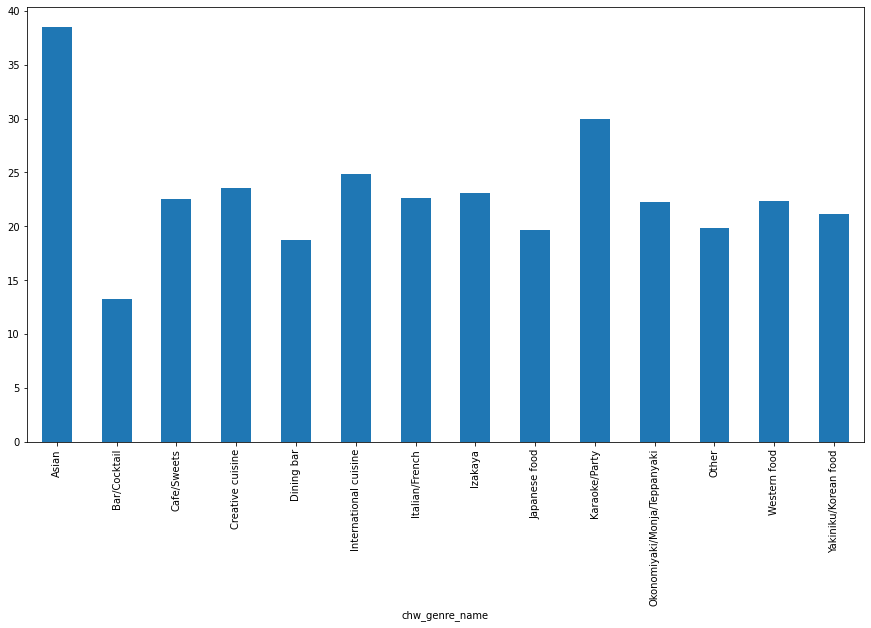

In [ ]:
plt.figure(figsize=(15, 8))
genGp =  train_df.groupby(['chw_genre_name'])
genGp['visitors'].mean().plot.bar()

###Area wise analysis of visitors

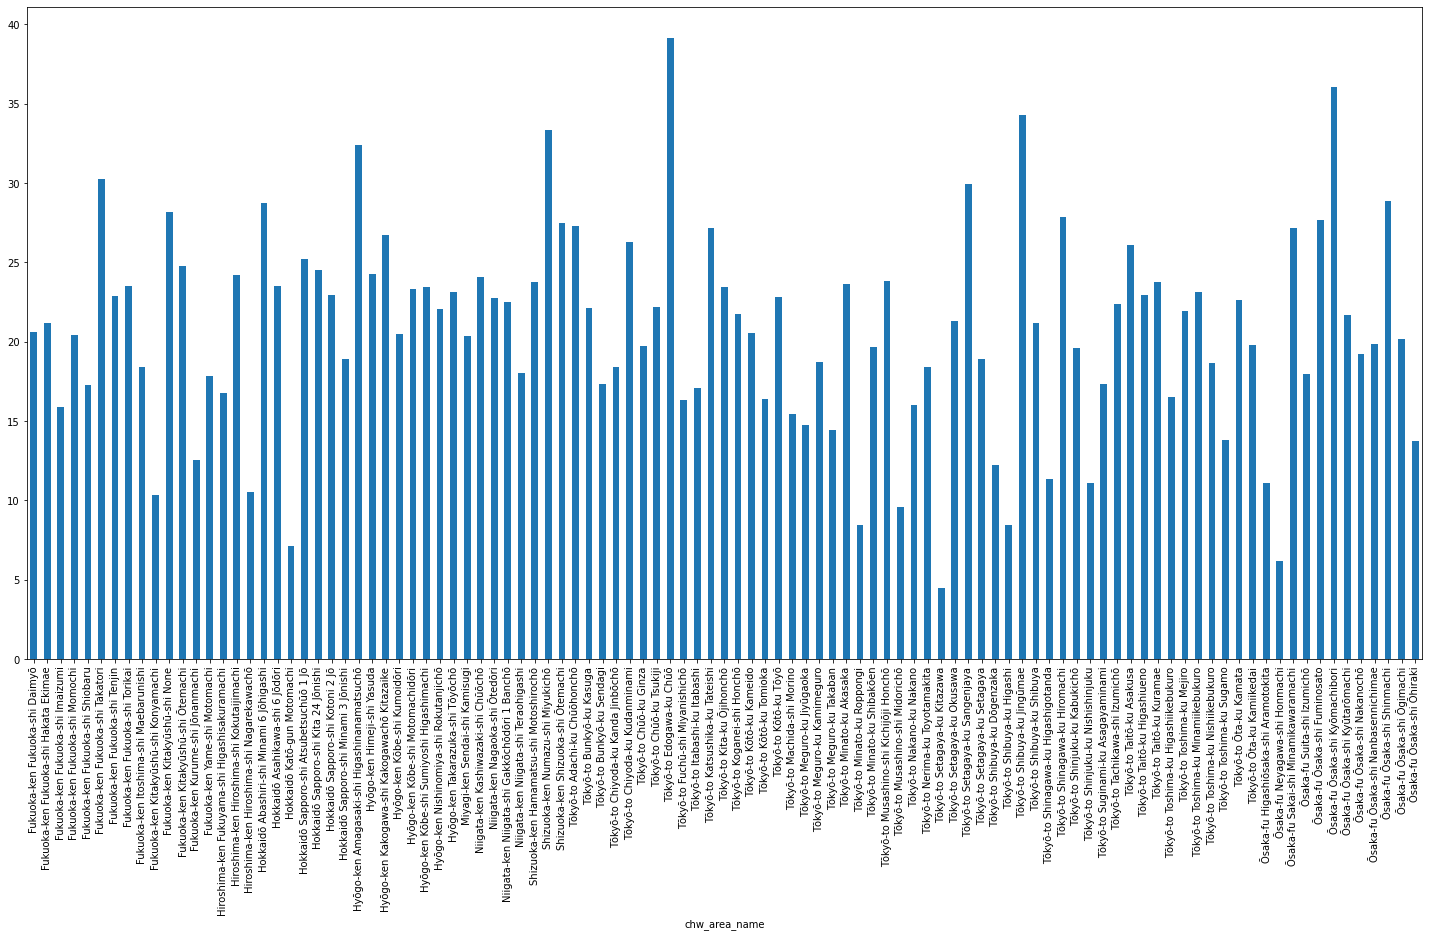

In [ ]:
plt.figure(figsize=(25, 12))
areaGp =  train_df.groupby(['chw_area_name'])
areaGp['visitors'].mean().plot.bar()

###Time wise analsys of total reserve visitors in chwiggy restaraunt

In [ ]:
chw_res['visit_time'] = chw_res.apply(lambda row : row['visit_datetime'].split(" ")[1].split(':')[0], axis=1)
chw_res['visit_time'] = pd.to_numeric(chw_res['visit_time'])

In [ ]:
chw_res.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,day_of_week,holiday_flg,visit_time
0,air_877f79706adbfb06,1/1/2016 19:00,1/1/2016 16:00,1,2016-01-01,Friday,1,19
1,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,3,2016-01-01,Friday,1,19
2,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,6,2016-01-01,Friday,1,19
3,air_877f79706adbfb06,1/1/2016 20:00,1/1/2016 16:00,2,2016-01-01,Friday,1,20
4,air_db80363d35f10926,1/1/2016 20:00,1/1/2016 1:00,5,2016-01-01,Friday,1,20


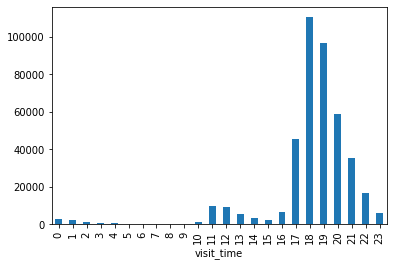

In [ ]:
chw_res.groupby('visit_time')['reserve_visitors'].sum().plot.bar()

###Time wise analsys of total reserve visitors in yomato restaraunt

In [ ]:
yom_res['visit_time'] = yom_res.apply(lambda row : row['visit_datetime'].split(" ")[1].split(':')[0], axis=1)
yom_res['visit_time'] = pd.to_numeric(yom_res['visit_time'])

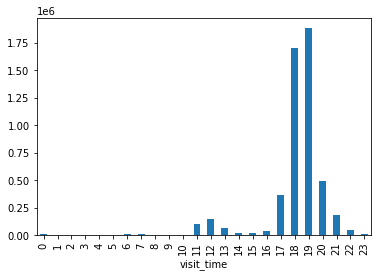

In [ ]:
yom_res.groupby('visit_time')['reserve_visitors'].sum().plot.bar()

In [ ]:
# dsplit_chw_res['visit_time'] = dsplit_chw_res.apply(lambda row : row['visit_time'].split(":")[0], axis=1)
# dsplit_chw_res['visit_time'] = pd.to_numeric(dsplit_chw_res['visit_time'])

In [ ]:
# dsplit_chw_res.groupby('visit_time')['reserve_visitors'].sum().plot.bar()

In [ ]:
# dsplit_chw_res['reserve_time'] = dsplit_chw_res.apply(lambda row : row['reserve_time'].split(":")[0], axis=1)
# dsplit_chw_res['reserve_time'] = pd.to_numeric(dsplit_chw_res['reserve_time'])

<AxesSubplot:xlabel='reserve_time'>

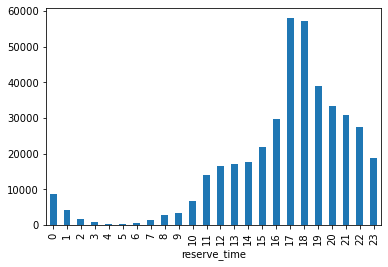

In [ ]:
# dsplit_chw_res.groupby('reserve_time')['reserve_visitors'].sum().plot.bar()

## Adding reserve information

In [ ]:
store_rel.head()

,chw_store_id,yom_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [ ]:
train_df = pd.merge(left = train_df, right = store_rel, left_on = 'chw_store_id', right_on='chw_store_id', how="left")

In [ ]:
chw_res.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,1/1/2016 19:00,1/1/2016 16:00,1
1,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,3
2,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,6
3,air_877f79706adbfb06,1/1/2016 20:00,1/1/2016 16:00,2
4,air_db80363d35f10926,1/1/2016 20:00,1/1/2016 1:00,5


## Rough Model without considering reserve info

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

chw_res = pd.read_csv("/content/chw_reserve.csv")
chw_sinfo = pd.read_csv("/content/chw_store_info.csv")
dinfo = pd.read_csv("/content/date_info.csv")
store_rel = pd.read_csv("/content/store_id_relation.csv")
yom_res = pd.read_csv("/content/yom_reserve.csv")
yom_sinfo = pd.read_csv("/content/yom_store_info.csv")

In [ ]:
# Matching the format of date on dinfo with that of test and train so that it merges easily
dinfo['calendar_date'] = dinfo.apply(lambda row : datetime.datetime.strptime(row['calendar_date'], '%Y-%m-%d').strftime('%-m/%-d/%Y'), axis=1)
dinfo.head()

dinfo.set_index('calendar_date', inplace=True)

train_df = pd.merge(left = train_df, right = dinfo, left_on = 'visit_date', right_on='calendar_date', how="left")

train_df = pd.merge(left = train_df, right = chw_sinfo, left_on = 'chw_store_id', right_on='chw_store_id', how="left")

train_df[["month", "day", "year"]] = train_df["visit_date"].str.split("/", expand = True)
train_df['day'] = pd.to_numeric(train_df['day'])
train_df['month'] = pd.to_numeric(train_df['month'])
train_df['year'] = pd.to_numeric(train_df['year'])

In [ ]:
train_df.head()

,chw_store_id,visit_date,visitors,day_of_week,holiday_flg,chw_genre_name,chw_area_name,latitude,longitude,month,day,year
0,air_3561fd1c0bce6a95,8/25/2016,8,Thursday,0,Italian/French,Tōkyō-to Ōta-ku Kamiikedai,35.602201,139.697689,8,25,2016
1,air_26c5bbeb7bb82bf1,1/11/2017,9,Wednesday,0,Cafe/Sweets,Tōkyō-to Kita-ku Ōjihonchō,35.752804,139.733480,1,11,2017
2,air_c1ff20617c54fee7,8/10/2016,13,Wednesday,0,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,35.641463,139.698171,8,10,2016
3,air_310e467e6e625004,3/10/2017,17,Friday,0,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,3,10,2017
4,air_671b4bea84dafb67,6/1/2016,34,Wednesday,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,6,1,2016


In [ ]:
train_df = pd.get_dummies(train_df, columns=['day_of_week', 'chw_genre_name', 'chw_area_name'], drop_first=True)

In [ ]:
train_df.dtypes

chw_store_id                                          object
visit_date                                            object
visitors                                               int64
holiday_flg                                            int64
latitude                                             float64
                                                      ...   
chw_area_name_Ōsaka-fu Ōsaka-shi Nakanochō             uint8
chw_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae      uint8
chw_area_name_Ōsaka-fu Ōsaka-shi Shinmachi             uint8
chw_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi              uint8
chw_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki               uint8
Length: 130, dtype: object

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def normalizeCols(X, cols):
    for c in cols:
        X[c] = (X[c]-X[c].mean())/X[c].std()
        
def dosplit(df, fcols, targetcol):
    X = df.loc[:, fcols]
    y = df[targetcol]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30, random_state=3)
    return (X_train, X_test, y_train, y_test)

In [ ]:
totcols = list(train_df.columns[2:])
targcol = 'visitors'
featcol = [ccol for ccol in totcols if ccol != targcol]

In [ ]:
X_train,X_test,y_train,y_test = dosplit(train_df, featcol, targcol)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
def rmlse(y_test, yhat_test):
    return np.sqrt(((np.log(y_test+1)-np.log(yhat_test+1))**2).mean())
    

In [ ]:
yhat_test = lr_model.predict(X_test)
rmlse(y_test, yhat_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


0.7890539761352625

In [ ]:
samp_sub = pd.read_csv("/content/sample_submission.csv")

In [ ]:
samp_sub.head()

,id,visitors
0,air_e7d2ac6d53d1b744_12/9/2016,0
1,air_55c3627912b9c849_2/1/2016,0
2,air_d1418d6fd6d634f2_9/16/2016,0
3,air_88ca84051ba95339_1/19/2016,0
4,air_4d71826793c09b22_1/10/2017,0


In [ ]:
test_df = pd.merge(left = test_df, right = dinfo, left_on = 'visit_date', right_on='calendar_date', how="left")

test_df = pd.merge(left = test_df, right = chw_sinfo, left_on = 'chw_store_id', right_on='chw_store_id', how="left")

test_df[["month", "day", "year"]] = test_df["visit_date"].str.split("/", expand = True)
test_df['day'] = pd.to_numeric(test_df['day'])
test_df['month'] = pd.to_numeric(test_df['month'])
test_df['year'] = pd.to_numeric(test_df['year'])

test_df = pd.get_dummies(test_df, columns=['day_of_week', 'chw_genre_name', 'chw_area_name'], drop_first=True)

In [ ]:
test_df.shape

(23968, 129)

In [ ]:
st = set(test_df.columns)
for col in train_df.columns:
  if col not in st:
    test_df['col'] = 0

In [ ]:
test_df.shape

(23968, 130)

In [ ]:
train_df.shape

(215705, 130)

In [ ]:
totcols = list(train_df.columns[2:])
targcol = 'visitors'
featcol = [ccol for ccol in totcols if ccol != targcol]

X_tr = train_df.loc[:, featcol]
y_tr = train_df[targcol]

In [ ]:
X_te = test_df.loc[:, featcol]

In [ ]:
test_df.shape

(23968, 130)

In [ ]:
train_df.shape

(215705, 130)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_te = lr_model.predict(X_te)

In [ ]:
samp_sub.head()

,id,visitors
0,air_e7d2ac6d53d1b744_12/9/2016,0
1,air_55c3627912b9c849_2/1/2016,0
2,air_d1418d6fd6d634f2_9/16/2016,0
3,air_88ca84051ba95339_1/19/2016,0
4,air_4d71826793c09b22_1/10/2017,0


In [ ]:
samp_sub['visitors'] = y_te

In [ ]:
samp_sub

,id,visitors
0,air_e7d2ac6d53d1b744_12/9/2016,19.368412
1,air_55c3627912b9c849_2/1/2016,18.291876
2,air_d1418d6fd6d634f2_9/16/2016,24.876239
3,air_88ca84051ba95339_1/19/2016,25.820480
4,air_4d71826793c09b22_1/10/2017,14.517571
...,...,...
23963,air_f6cdaf7b7fdc6d78_1/25/2017,21.175829
23964,air_04cae7c1bc9b2a0b_12/5/2016,17.461673
23965,air_dea0655f96947922_12/21/2016,15.840696
23966,air_e270aff84ac7e4c8_9/2/2016,25.803752


In [ ]:
samp_sub.to_csv("regFirstSub.csv", index=False)